# Problem set 2 numerical scratchpad

This notebook provides a companion to some of the problem set solutions

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

## Question 2

Question 2 was about programming a solver for the cubic equation. Although the problem set suggested to use `fsolve`, we use `root` here, which is a more streamlined and powerful version (discussed in Lecture 12).

In [13]:
ep = 0.1 # epsilon value
xguess = 1.1 # Initial guess of root

f = lambda x: ep*x**3 - x + 1
sol = root(f, xguess)
print(sol.message)
print("The root found was x = ", sol.x[0])


The solution converged.
The root found was x =  1.1534673051457625


## Question 3

This question asked to develop asymptotic solutions and to also check their values to the exact values at a few values of epsilon. The below code will do this

In [14]:
ep = np.array([0.1, 0.08, 0.06, 0.04, 0.02])
# Set an initial guess 
xguess = 1.1
for val in ep:
    f = lambda x: val*x**3 - x + 1
    sol = root(f, xguess)
    print(sol.message)
    print("ep = ", val, ", x = ", sol.x)
    xguess = sol.x

The solution converged.
ep =  0.1 , x =  [1.15346731]
The solution converged.
ep =  0.08 , x =  [1.10916323]
The solution converged.
ep =  0.06 , x =  [1.0744165]
The solution converged.
ep =  0.04 , x =  [1.04574424]
The solution converged.
ep =  0.02 , x =  [1.02130578]


When doing part (ii) by hand, I found a gradient of about 1.6 (see the solutions). Let's do more points to check.

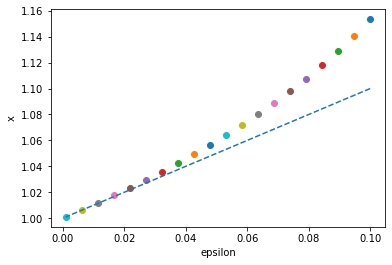

In [15]:
ep = np.linspace(0.1, 0.001, 20)
# Set an initial guess 
xguess = 1.1
plt.figure
for val in ep:
    f = lambda x: val*x**3 - x + 1
    sol = root(f, xguess)
    xguess = sol.x
    plt.plot(val, sol.x, 'o')
plt.plot(ep, 1 + ep, '--')
plt.xlabel('epsilon');
plt.ylabel('x');

## Question 4 

A plot of the parabolic motion with and without damping. We see the effect of damping is to suppress the motion

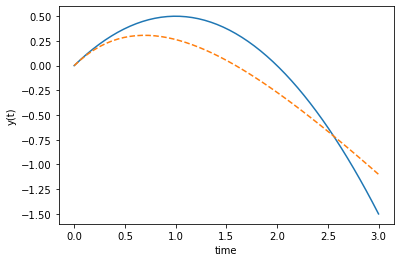

In [16]:
a = 1 # Amount of damping
t = np.linspace(0, 3, 50)
y0_nodamp = -t**2/2 + t
y0_damp = 1/a**2 + 1/a - np.exp(-a*t)*(1/a**2 + 1/a) - t/a
plt.figure;
plt.plot(t, y0_nodamp);
plt.plot(t, y0_damp, '--');
plt.xlabel('time');
plt.ylabel('y(t)');

## Question 5

The point of this question is to practice solving ODEs numerically by hand. You will use Python to check how accurate this is. We modify a previous script to calculate the solution.

In [17]:
ep = 0.2 # epsilon value
tmax = 0.6 # max time

# Define function for the ODE
def f(t, Y):
    ep = 0.2
    a = 1 # <--- Additional damping
    y, yp = Y
    # Modify the ODE for additional damping
    ypp = -1/(1 + ep*y)**2 - a*yp/(1 + ep*y)
    return [yp, ypp]

# define the initial condition
Y0 = [0, 1]

sol = solve_ivp(f, [0, tmax], Y0, dense_output=True)

# To access the solution at the last value, use y[0, -1].
# This is equivalent to matlab's y(1,end)
print("The value at t = ", tmax, "is y(tmax) = ", sol.y[0,-1])

The value at t =  0.6 is y(tmax) =  0.3133199366241208


For the Euler's method application, you should try to work it out by hand, but here we cheat slightly and verify the construction of the table. 

In [18]:
Y = np.array([0, 1]) # Initial condition
t = 0
ep = 0.2
dt = 0.2
for i in np.arange(1,5):    
    # In order to do arithmetic with vectors, 
    # you must convert to a numpy array
    F = np.array(f(t,Y))
    print(np.round(t,2), np.round(Y,2), np.round(1 + ep*Y[0],2), np.round(F,2), np.round(F*dt,2))
    # Increment
    Y = Y + F*dt
    t = t + dt

0 [0 1] 1.0 [ 1. -2.] [ 0.2 -0.4]
0.2 [0.2 0.6] 1.04 [ 0.6 -1.5] [ 0.12 -0.3 ]
0.4 [0.32 0.3 ] 1.06 [ 0.3  -1.16] [ 0.06 -0.23]
0.6 [0.38 0.07] 1.08 [ 0.07 -0.93] [ 0.01 -0.19]


In [19]:
print("Full numerical = ", sol.y[0,-1])
print("Euler = ", Y[0])
asym = 1/1**2 + 1/1 - np.exp(-1*0.6)*(1/1**2 + 1/1) - 0.6/1
print("Asymptotic = ", asym) 

Full numerical =  0.3133199366241208
Euler =  0.39328189116292983
Asymptotic =  0.30237672781194724
